<a href="https://colab.research.google.com/github/IsidoraJevremovic/osnovi-astronomije/blob/main/mesec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pillow

In [2]:
pip install ephem

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 8.6 MB/s eta 0:00:00


In [3]:
!pip install pillow matplotlib


In [4]:
from google.colab import files

# Open a file upload dialog
uploaded = files.upload()


Saving full_moon.png to full_moon.png


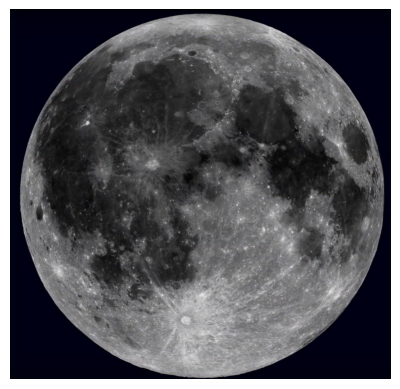

In [24]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageDraw
from IPython.display import display, clear_output
import time

# Function to add shadow based on phase (0 to 1, where 0 is new moon and 1 is full moon)
def add_shadow(phase, img_path='full_moon.png'):
    moon = Image.open(img_path).convert("RGBA")
    width, height = moon.size
    shadow = Image.new('RGBA', (width, height), (0, 0, 0, 0))
    draw = ImageDraw.Draw(shadow)

    if phase < 0.5:
        # Waxing phases
        arc_extent = 180 * (1 - phase * 2)
        draw.pieslice([0, 0, width, height], start=90 - arc_extent, end=90 + arc_extent, fill=(0, 0, 0, 255))
    else:
        # Waning phases
        arc_extent = 180 * ((phase - 0.5) * 2)
        draw.pieslice([0, 0, width, height], start=270 - arc_extent, end=270 + arc_extent, fill=(0, 0, 0, 255))

    combined = Image.alpha_composite(moon, shadow)
    return combined

# Function to display image in a Jupyter notebook
def display_image(phase):
    img = add_shadow(phase)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

# Function to animate moon phases
def animate_moon_phases():
    days = 29.5
    interval = 0.1  # seconds
    for day in range(int(days * 2)):
        phase = day / (days * 2)
        clear_output(wait=True)
        display_image(phase)
        time.sleep(interval)

# Define the phases and create buttons for each phase
phases = [("New Moon", 0), ("Waxing Crescent", 0.125), ("First Quarter", 0.25),
          ("Waxing Gibbous", 0.375), ("Full Moon", 0.5), ("Waning Gibbous", 0.625),
          ("Third Quarter", 0.75), ("Waning Crescent", 0.875)]

# Display buttons and images in the notebook
from IPython.display import display, HTML

buttons_html = ""
for phase_name, phase_value in phases:
    buttons_html += f'<button onclick="update_image({phase_value})">{phase_name}</button> '

buttons_html += '<button onclick="animate_moon_phases()">Animate Phases</button>'

display(HTML(buttons_html))

# JavaScript function to update image
js = """
<script>
function update_image(phase) {
    google.colab.kernel.invokeFunction('notebook.update_image', [phase], {});
}

function animate_moon_phases() {
    google.colab.kernel.invokeFunction('notebook.animate_moon_phases', [], {});
}
</script>
"""

display(HTML(js))

# Register the Python functions as callable from JavaScript
from google.colab import output

def py_update_image(phase):
    clear_output(wait=True)
    display_image(phase)

output.register_callback('notebook.update_image', py_update_image)
output.register_callback('notebook.animate_moon_phases', animate_moon_phases)

# Display the initial full moon image
display_image(0.5)


Saving full_moon.png to full_moon (19).png
Select a moon phase:
1: New Moon
2: Waxing Crescent
3: First Quarter
4: Waxing Gibbous
5: Full Moon
6: Waning Gibbous
7: Third Quarter
8: Waning Crescent
9: Animate Moon Phases
0: Exit
Enter your choice: 2


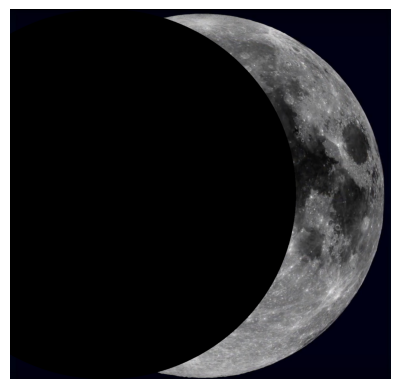

Enter your choice: 8


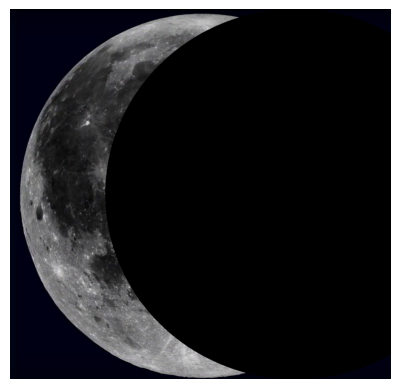

Enter your choice: 4


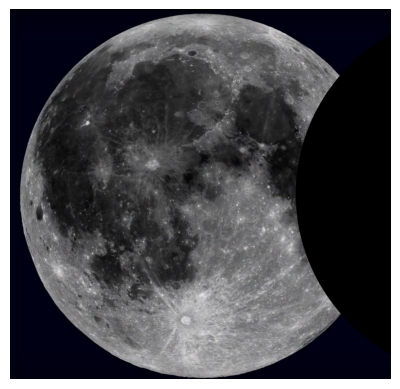

Enter your choice: 6


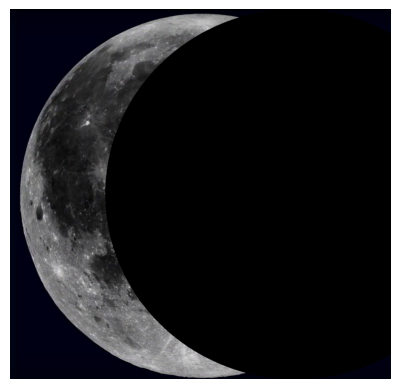

Enter your choice: 0


In [41]:
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
from IPython.display import display, clear_output
import time

# Function to add shadow based on phase (0 to 1, where 0 is new moon and 1 is full moon)
def add_shadow(phase, img_path='full_moon.png'):
    moon = Image.open(img_path).convert("RGBA")
    width, height = moon.size
    shadow = Image.new('RGBA', (width, height), (0, 0, 0, 0))
    draw = ImageDraw.Draw(shadow)

    # Calculate shadow position based on phase
    if phase == 0:  # New Moon
        draw.rectangle([0, 0, width, height], fill=(0, 0, 0, 255))
    elif phase == 1:  # Full Moon
        pass  # No shadow
    else:
        if phase < 0.5:  # Waxing phases
            extent = 2 * (0.5 - phase) * width
            draw.ellipse([-extent, 0, width - extent, height], fill=(0, 0, 0, 255))
        elif phase == 0.5:
            extent = width/2
            draw.sqare(width/2, height, fill=(0, 0, 0, 255))
        else:  # Waning phases
            extent = 2 * (phase - 0.5) * width
            draw.ellipse([extent, 0, width + extent, height], fill=(0, 0, 0, 255))

    combined = Image.alpha_composite(moon, shadow)
    return combined

# Function to display image in a Jupyter notebook
def display_image(phase):
    img = add_shadow(phase)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

# Function to animate moon phases
def animate_moon_phases():
    days = 29.5
    interval = 0.1  # seconds
    for day in range(int(days * 2)):
        phase = day / (days * 2)
        clear_output(wait=True)
        display_image(phase)
        time.sleep(interval)

# Display the buttons in a text-based menu
def menu():
    phases = [("New Moon", 0), ("Waxing Crescent", 0.375), ("First Quarter", 0.5),
              ("Waxing Gibbous", 0), ("Full Moon", 1), ("Waning Gibbous", 0),
              ("Third Quarter", 0.5), ("Waning Crescent", 0.625)]

    print("Select a moon phase:")
    for i, (phase_name, phase_value) in enumerate(phases):
        print(f"{i + 1}: {phase_name}")

    print("9: Animate Moon Phases")
    print("0: Exit")

    while True:
        choice = int(input("Enter your choice: "))
        if choice == 0:
            break
        elif choice == 9:
            animate_moon_phases()
        elif 1 <= choice <= 8:
            display_image(phases[choice - 1][1])
        else:
            print("Invalid choice, please try again.")

# Upload your full_moon.png image
uploaded = files.upload()

# Display the initial full moon image and show the menu
#display_image(0.5)
menu()
